# 1D Fourier Transform - part 6

<a id='ref'></a>
## References

* Yilmaz, Öz (2001). Seismic Data Analysis: Processing, Inversion, and Interpretation of Seismic Data, 2 ed.: Society of Exploration Geophysicists. ISBN 1-56080-098-4

In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq
import matplotlib.pyplot as plt
import my_functions as mfun

<a id='sec1'></a>
## Synthetic data

In [2]:
# number of samples
N = 800

In [3]:
# period (in seconds)
T0 = 1

In [4]:
# sampling interval (is seconds)
dt = T0/N
print(dt)

0.00125


In [5]:
# time (in seconds)
t = np.linspace(0, N*dt, N)

In [6]:
def synthetic_signal(A, f, t):
    signal = np.zeros_like(t)
    for Ai, fi in zip(A, f):
        signal += Ai*np.sin(2*np.pi*fi*t)
    return signal

In [7]:
f = [10, 30,  2] # Hertz (Hz)
A = [10,  5, 15] # Amplitude

In [8]:
signal = synthetic_signal(A, f, t)

In [9]:
signal1 = synthetic_signal([A[0]], [f[0]], t)
signal2 = synthetic_signal([A[1]], [f[1]], t)
signal3 = synthetic_signal([A[2]], [f[2]], t)

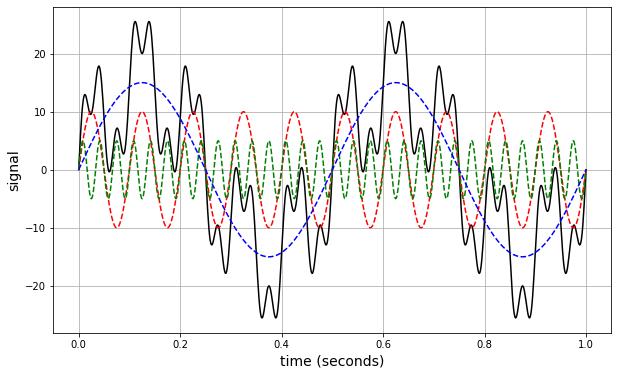

In [10]:
plt.figure(figsize=(10,6))
plt.plot(t, signal, 'k-')
plt.plot(t, signal1, 'r--')
plt.plot(t, signal2, 'g--')
plt.plot(t, signal3, 'b--')
plt.xlabel('time (seconds)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.grid()
plt.show()

In [11]:
FT_signal = fft(x=signal, norm=None)

In [12]:
Amplitude = np.abs(FT_signal)

Amplitude_max = np.max(Amplitude)

In [13]:
freqs = fftfreq(n=N, d=dt)

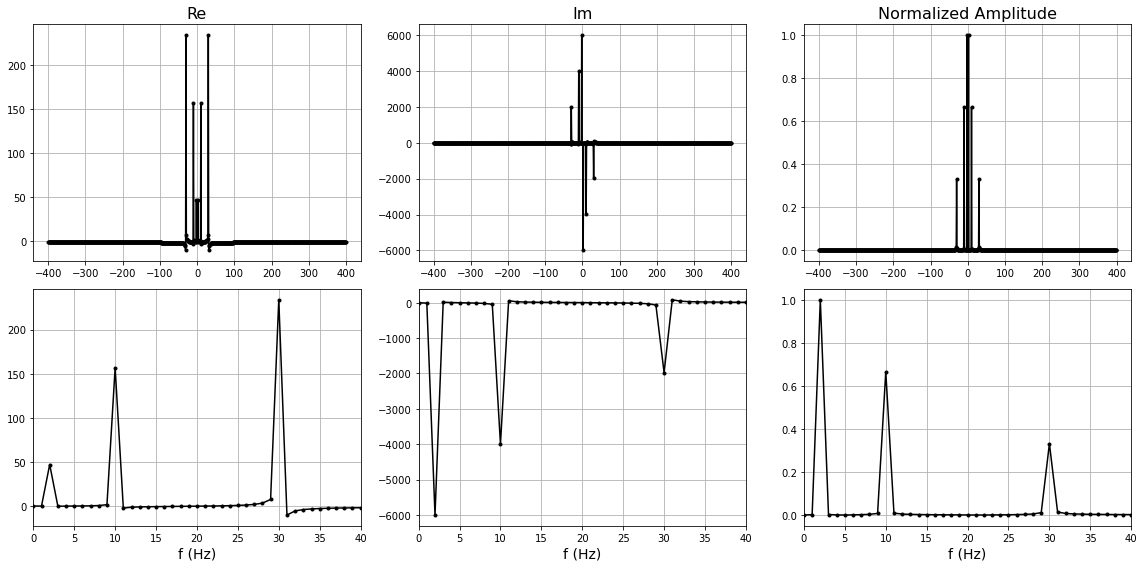

In [14]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
plt.title('Re', fontsize=16)
# plt.plot(freqs, FT_signal.real, 'r.-')
plt.plot(fftshift(freqs), fftshift(FT_signal).real, 'k.-')
plt.grid()
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,2)
plt.title('Im', fontsize=16)
# plt.plot(freqs, FT_signal.imag, 'b.-')
plt.plot(fftshift(freqs), fftshift(FT_signal).imag, 'k.-')
plt.grid()
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,3)
plt.title('Normalized Amplitude', fontsize=16)
# plt.plot(freqs, Amplitude/Amplitude_max, 'r.-')
plt.plot(fftshift(freqs), fftshift(Amplitude)/Amplitude_max, 'k.-')
plt.grid()
#plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,4)
#plt.title('Re', fontsize=16)
plt.plot(freqs[:N//2], FT_signal[:N//2].real, 'k.-')
plt.xlim(0,40)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,5)
#plt.title('Im', fontsize=16)
plt.plot(freqs[:N//2], FT_signal[:N//2].imag, 'k.-')
plt.xlim(0,40)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.subplot(2,3,6)
#plt.title('Amplitude', fontsize=16)
plt.plot(freqs[:N//2], Amplitude[:N//2]/Amplitude_max, 'k.-')
plt.xlim(0,40)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.tight_layout()

plt.show()

In [15]:
signal_recovered = ifft(x=FT_signal, norm=None).real

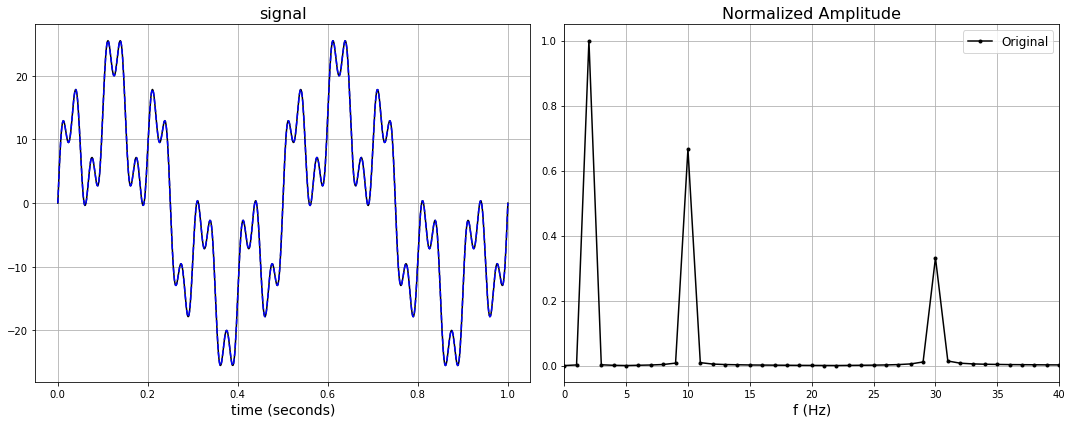

In [16]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('signal', fontsize=16)
plt.plot(t, signal, 'k-')
plt.plot(t, signal_recovered, 'b--')
plt.xlabel('time (seconds)', fontsize=14)
#plt.legend(loc='best')
plt.grid()

plt.subplot(1,2,2)
plt.title('Normalized Amplitude', fontsize=16)
plt.plot(freqs[:N//2], Amplitude[:N//2]/Amplitude_max, 'k.-', label='Original')
plt.xlim(0, 40)
plt.legend(loc='best', fontsize=12, )
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.tight_layout()

plt.show()

## Filtering

Is it possible to remove parts of our signal? The answer is "yes". The cells below show how to do this in the frequency domain. Why in the frequency domain? Because there we can "see" the components forming our signal.

In [27]:
def filter_box(freqs, cutoff):
    assert cutoff, 'cutoff is positive'
    f = np.ones_like(freqs)
    mask_lower = (np.abs(freqs) < cutoff)
    mask_equal = (np.abs(freqs) == cutoff)
    mask_greater = (np.abs(freqs) > cutoff)
    f[mask_lower] = 1
    f[mask_equal] = 0.5
    f[mask_greater] = 0
    return f

Lets define the parts of our signal that we want to remove. This is made in the frequency domain.

In [28]:
# define the cutoff 
freq_cut = 15

In [29]:
# define the filter
box = filter_box(freqs=freqs, cutoff=freq_cut)

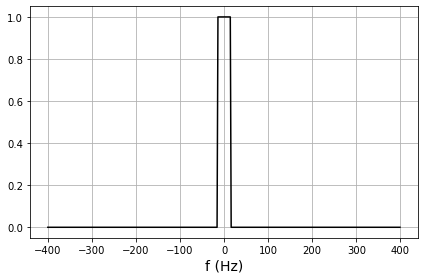

In [30]:
plt.figure(figsize=(6,4))
plt.plot(fftshift(freqs), fftshift(box), 'k-')
plt.xlabel('f (Hz)', fontsize=14)
plt.grid()

plt.tight_layout()

plt.show()

Our filter is an $N \times 1$ vector (where $N$ is the number of samples) formed by ones and zeros. The ones are placed at the positions with absolute frequencies smaller than `freq_cut`.

In [31]:
FT_signal_filtered = box*FT_signal

In [32]:
Amplitude_filtered = np.abs(FT_signal_filtered)

In [33]:
signal_recovered = ifft(x=FT_signal_filtered, norm=None).real

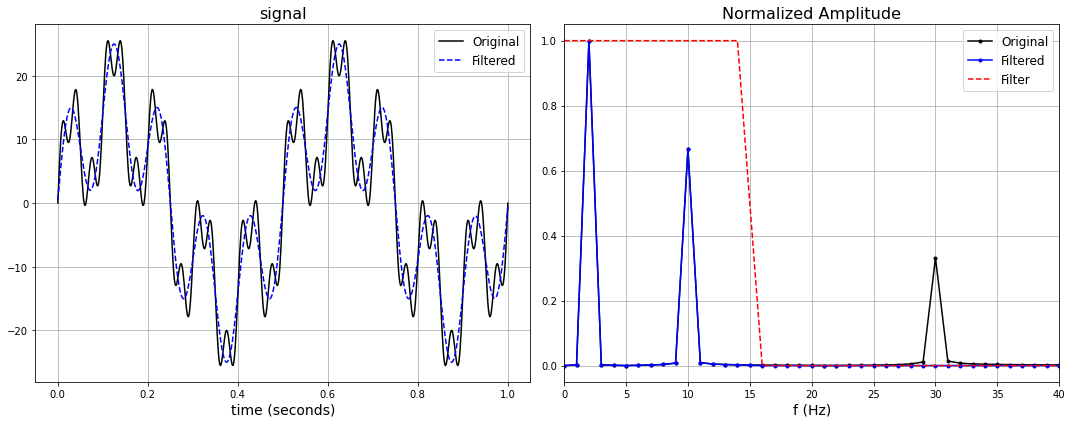

In [34]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('signal', fontsize=16)
plt.plot(t, signal, 'k-', label='Original')
plt.plot(t, signal_recovered, 'b--', label='Filtered')
plt.xlabel('time (seconds)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()

plt.subplot(1,2,2)
plt.title('Normalized Amplitude', fontsize=16)
plt.plot(freqs[:N//2], Amplitude[:N//2]/Amplitude_max, 'k.-', label='Original')
plt.plot(freqs[:N//2], Amplitude_filtered[:N//2]/Amplitude_max, 'b.-', label='Filtered')
plt.plot(freqs[:N//2], box[:N//2], 'r--', label='Filter')
plt.xlim(0, 40)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.xlabel('f (Hz)', fontsize=14)

plt.tight_layout()

plt.show()

The operation of "removing parts of our signal" is represented by the Hadamard (entry-wise) product of the Amplitude spectra (continuous black line) and a filter (dashed red line). Notice that this product replaced all values of the Fourier Transform with absolute frequencies greater that `freq_high`. The result is a filtered signal (dashed blue line) without the component with frequency `f = 30` Hz and amplitude `A = 5`.

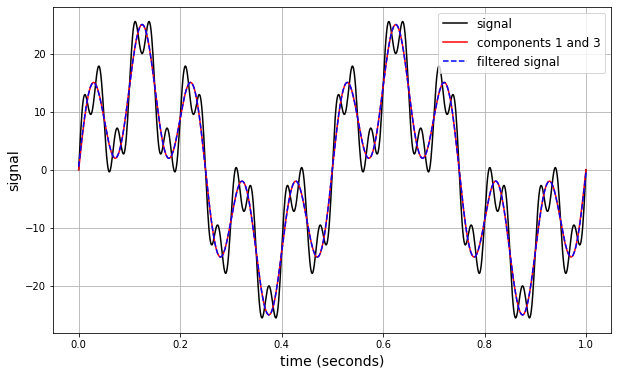

In [35]:
plt.figure(figsize=(10,6))
plt.plot(t, signal, 'k-', label='signal')
plt.plot(t, signal1+signal3, 'r-', label='components 1 and 3')
plt.plot(t, signal_recovered, 'b--', label='filtered signal')
plt.xlabel('time (seconds)', fontsize=14)
plt.ylabel('signal', fontsize=14)
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.show()

The filtered signal (dashed blue line) is equivalent to the sum of components 1 (`f = 10` Hz and amplitude `A = 10`) and 3 (`f = 2` Hz and amplitude `A = 15`) forming our signal (continuous black line).

In [36]:
f

[10, 30, 2]

In [37]:
A

[10, 5, 15]

The process of removing part of our signal is represented here as a Hadamard product in the frequency domain. Is there an analogous operation in the data domain that produces the same result?

The answer is "yes". Is this case, the equivalent operation in data domain is called "convolution" (see the notebook `convolution_correlation_1D_1.ipynb`).